In [ ]:
# installare (se necessario) e importare GeoPandas

In [1]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 20.9 MB/s 
     |████████████████████████████████| 15.4 MB 47.7 MB/s 
     |████████████████████████████████| 6.3 MB 61.6 MB/s 


In [2]:
%matplotlib inline

import pandas as pd
import geopandas

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# caricare il geodataset delle piste ciclabili bike_ciclabili.zip

In [4]:
piste_ciclabili = geopandas.read_file("/content/gdrive/MyDrive/Colab Notebooks/bike_ciclabili/bike_ciclabili.dbf").to_crs(epsg = 3857)
piste_ciclabili

,id_amat,id_via,anagrafica,gerarchia,rete,tipologia,sede,marcia,norma,lunghezza,geometry
0,9001,1064,PIAZZA VENTICINQUE APRILE,None,urbana,percorso promiscuo - pedonale e ciclabile,carreggiata,bidirezionale,FACILITAZIONE - area pedonale,43.0,"LINESTRING (1022692.072 5697557.445, 1022687.6..."
1,9002,3377,VIA GIACOMO MEDICI DEL VASCELLO,None,ciclabile,corsia ciclabile - sede propria,marciapiede,bidirezionale,ordinanza lavori stradali,465.0,"LINESTRING (1028805.815 5690949.659, 1028817.1..."
2,9003,3377,VIA GIACOMO MEDICI DEL VASCELLO,None,ciclabile,corsia ciclabile - sede propria,marciapiede,bidirezionale,ordinanza lavori stradali,60.0,"LINESTRING (1028568.954 5691051.732, 1028581.8..."
3,9004,3377,VIA GIACOMO MEDICI DEL VASCELLO,None,ciclabile,corsia ciclabile - sede propria,marciapiede,bidirezionale,ordinanza lavori stradali,6.0,"LINESTRING (1028483.188 5691457.031, 1028479.0..."
4,9005,3377,VIA GIACOMO MEDICI DEL VASCELLO,None,ciclabile,corsia ciclabile - sede propria,marciapiede,bidirezionale,ordinanza lavori stradali,28.0,"LINESTRING (1028581.088 5691056.943, 1028574.9..."
...,...,...,...,...,...,...,...,...,...,...,...
3160,12932,6272,VIALE ERGISTO BEZZI,None,ciclabile,corsia ciclabile - bike lane,carreggiata,monodirezionale - concorde,ordinanza lavori stradali,4.0,"LINESTRING (1018547.330 5694264.872, 1018550.0..."
3161,12933,6272,VIALE ERGISTO BEZZI,None,ciclabile,corsia ciclabile - attraversamento DL 34/2020,attraversamento,monodirezionale - concorde,ordinanza lavori stradali,10.0,"LINESTRING (1018535.280 5694310.998, 1018542.4..."
3162,12934,6272,VIALE ERGISTO BEZZI,None,ciclabile,corsia ciclabile - bike lane,carreggiata,monodirezionale - concorde,ordinanza lavori stradali,5.0,"LINESTRING (1018531.839 5694304.469, 1018535.2..."
3163,12935,6272,VIALE ERGISTO BEZZI,None,ciclabile,corsia ciclabile - attraversamento DL 34/2020,attraversamento,monodirezionale - concorde,ordinanza lavori stradali,9.0,"LINESTRING (1018525.141 5694293.455, 1018531.8..."


In [ ]:
# visualizzaere il geodataset delel piste ciclabili

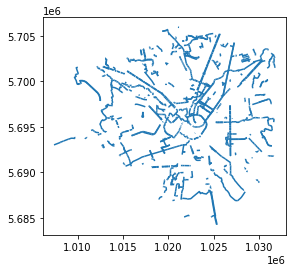

In [5]:
piste_ciclabili.plot()

In [ ]:
# caricare il geodataset dei quartieri di Milano ds964_nil_wm.zip

In [27]:
Quartieri_Milano = geopandas.read_file("/content/gdrive/MyDrive/Colab Notebooks/ds964_nil_wm/NIL_WM.dbf").to_crs(epsg = 3857)
Quartieri_Milano

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
0,48,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8723.368714,2.406306e+06,89,"POLYGON ((1019043.223 5690701.816, 1019040.205..."
1,64,TRENNO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3309.998800,4.896921e+05,90,"POLYGON ((1013700.561 5699020.396, 1013336.225..."
2,67,PORTELLO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3800.750663,9.096022e+05,91,"POLYGON ((1019281.533 5698653.937, 1019379.177..."
3,81,BOVISASCA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7105.469715,1.578028e+06,92,"POLYGON ((1020580.947 5704131.420, 1020451.234..."
4,84,PARCO NORD,05/02/2020,Vigente,Milano 2030 - PGT Approvato,11741.717005,1.532331e+06,93,"POLYGON ((1024184.198 5705106.594, 1024200.172..."
...,...,...,...,...,...,...,...,...,...
83,68,PAGANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5221.836696,1.289686e+06,172,"POLYGON ((1020993.250 5696802.574, 1020966.948..."
84,2,BRERA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5461.667196,1.637333e+06,173,"POLYGON ((1023209.291 5695669.544, 1023143.444..."
85,33,ROGOREDO - SANTA GIULIA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6012.496435,1.200116e+06,174,"POLYGON ((1028641.594 5691736.463, 1028685.812..."
86,17,ADRIANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,9276.875747,2.433358e+06,175,"POLYGON ((1031630.537 5702542.500, 1031599.390..."


In [ ]:
# installare (se necessario) e importare contextily e visualizzare la mappa di Milano con l'indicazione dei quartieri in nero (solo confini)
# e le piste ciclabili

In [24]:
!pip install contextily

In [28]:
import contextily as ctx

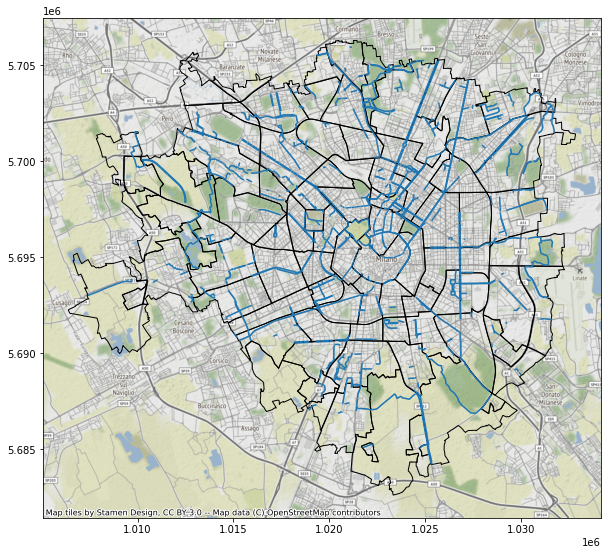

In [29]:
ax = Quartieri_Milano.to_crs(epsg = 3857).plot(edgecolor = 'k',color ='none',figsize = (10,10))
piste_ciclabili.to_crs(epsg=3857).plot(ax = ax,figsize  = (10,10))
ctx.add_basemap(ax)

In [33]:
# calcolare la dimensione media dell'area dei quartieri di Milano
MediaQuartieri = Quartieri_Milano.Shape_Area.mean()

In [49]:
# visualizzare i nomi dei quartieri più grandi della media
Quartieri_Milano[Quartieri_Milano.Shape_Area > MediaQuartieri]['NIL']

In [ ]:
# visualizzare i quartieri più grandi della media sulla mappa di Milano

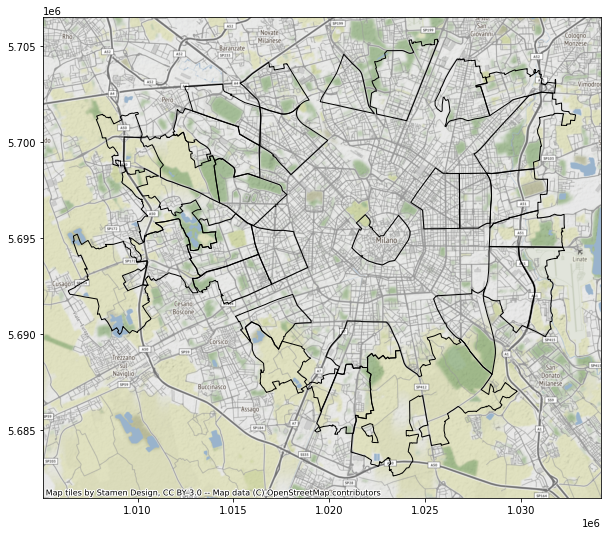

In [52]:
ax = Quartieri_Milano[Quartieri_Milano.Shape_Area > MediaQuartieri].to_crs(epsg = 3857).plot(edgecolor = 'k',color ='none',figsize = (10,10))
ctx.add_basemap(ax)

In [ ]:
# visualizzare una mappa con la legenda in modo che i quartieri più grandi abbiano colori diversi rispetto ai quartieri più piccoli. 
# La scala dei colori deve essere rossa e si deve riuscire ad intravedere in trasparenza la mappa sottostante

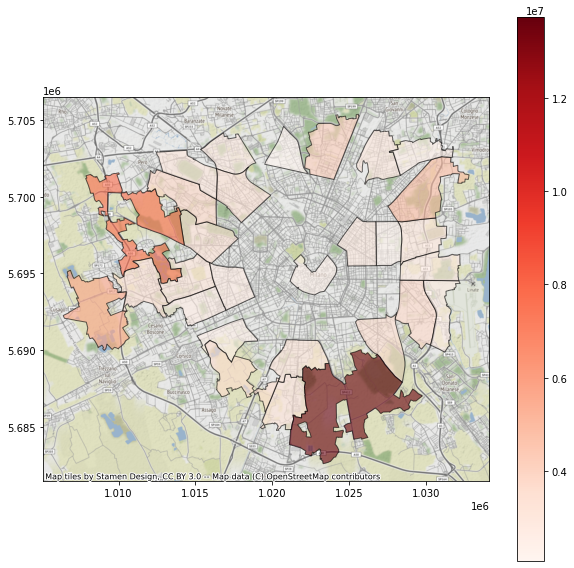

In [59]:
ax = Quartieri_Milano[Quartieri_Milano.Shape_Area > MediaQuartieri].to_crs(epsg = 3857).plot(edgecolor = 'k',figsize = (10,10),column = 'Shape_Area',legend = True,cmap = 'Reds',alpha = 0.6)
ctx.add_basemap(ax)

In [ ]:
# salvare in un geodataframe le informazioni sul quartiere di Greco, prendendole dal geodataframe dei quartieri

In [68]:

Quartiere_Greco = Quartieri_Milano[Quartieri_Milano.NIL == 'GRECO - SEGNANO']
Quartiere_Greco

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
17,13,GRECO - SEGNANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7468.531297,1.768603e+06,106,"POLYGON ((1025497.262 5702124.897, 1025502.138..."


In [ ]:
# trovare le piste ciclabili che passano per il quartiere di Greco

In [74]:
piste_ciclabili[piste_ciclabili.intersects(Quartiere_Greco.geometry.squeeze())]

,id_amat,id_via,anagrafica,gerarchia,rete,tipologia,sede,marcia,norma,lunghezza,geometry
171,9210,1414,VIA TOFANE,None,urbana,"percorso promiscuo - pedonale, ciclabile e vei...",sottopasso,bidirezionale,FACILITAZIONE - divieto di transito ecc. bici,15.0,"LINESTRING (1026010.948 5700608.198, 1026019.3..."
241,9287,1418,VIA EMILIO DE MARCHI,None,ciclabile,corsia ciclabile - sede propria,ponte,bidirezionale,corsia ciclabile,133.0,"LINESTRING (1025476.434 5701293.305, 1025478.4..."
308,9357,1108,VIA MELCHIORRE GIOIA,None,ciclabile,corsia ciclabile - sede propria,marciapiede,bidirezionale,corsia ciclabile,183.0,"LINESTRING (1025057.006 5700094.158, 1025035.7..."
369,9418,1427,VIALE SARCA,None,ciclabile,corsia ciclabile - sede propria,marciapiede,bidirezionale,corsia ciclabile,29.0,"LINESTRING (1024827.107 5702303.010, 1024824.3..."
381,9430,1761,VIA GUIDO VENOSTA,None,ciclabile,corsia ciclabile - sede propria,marciapiede,bidirezionale,corsia ciclabile,232.0,"LINESTRING (1025138.028 5701958.685, 1025095.2..."
442,9491,1418,VIA EMILIO DE MARCHI,None,ciclabile,corsia ciclabile - sede propria,ponte,bidirezionale,corsia ciclabile,28.0,"LINESTRING (1025365.476 5701615.163, 1025361.0..."
444,9493,1436,VIA ROBERTO COZZI,None,ciclabile,corsia ciclabile - segnaletica,marciapiede,bidirezionale,corsia ciclabile,49.0,"LINESTRING (1025212.271 5702014.658, 1025201.6..."
445,9494,1436,VIA ROBERTO COZZI,None,ciclabile,corsia ciclabile - attraversamento,attraversamento,bidirezionale,attraversamento - ciclabile con lanterna bici,17.0,"LINESTRING (1025139.950 5701949.769, 1025154.4..."
466,9515,1761,VIA GUIDO VENOSTA,None,ciclabile,corsia ciclabile - sede propria,marciapiede,bidirezionale,corsia ciclabile,117.0,"LINESTRING (1024980.356 5702241.601, 1024976.9..."
712,9759,1413,VIA TIRANO,None,urbana,percorso promiscuo - pedonale e ciclabile,carreggiata,bidirezionale,percorso promiscuo - pedonale e ciclabile,44.0,"LINESTRING (1025453.050 5700275.237, 1025473.9..."


In [ ]:
# visualizzare su una mappa il quartiere di Greco e le piste ciclabili che lo attraversano
# evidenziare bene in nero le piste ciclabili 

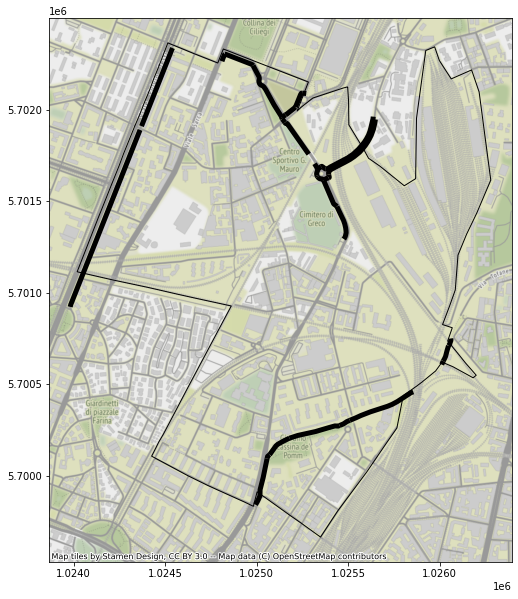

In [88]:
ax = piste_ciclabili[piste_ciclabili.intersects(Quartiere_Greco.geometry.squeeze())].to_crs(epsg = 3857).plot(color ='black',linewidth = 5,figsize = (10,10))
Quartiere_Greco.to_crs(epsg=3857).plot(ax = ax,figsize  = (10,10), facecolor = 'none',edgecolor = 'k')
ctx.add_basemap(ax)